# Identificación de arboles en CDMX

In [2]:
# Importación de las librerías necesarias
from OSMPythonTools.nominatim import Nominatim
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Creación de instancias para utilizar las APIs de OpenStreetMap
overpass = Overpass()
nominatim = Nominatim()

# Obtención del Id de la Ciudad de México (CDMX) a través de la API de Nominatim
areaId = nominatim.query('Mexico City').areaId()

# Construcción de la consulta para obtener los datos de los árboles en la CDMX
trees_query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='body', includeGeometry=True)

# Ejecución de la consulta a través de la API de Overpass
trees_data = overpass.query(trees_query)

# Construcción de un GeoDataFrame a partir de los datos obtenidos de los árboles
trees_geo = [(tree.geometry(), tree.id(), tree.tags()) for tree in trees_data.nodes()]
treescdmx = gpd.GeoDataFrame(trees_geo, columns=['geometry', 'OMSid', 'tags'])

# Separar las etiquetas (tags) del GeoDataFrame en columnas individuales
treescdmx = pd.concat([treescdmx.drop(['tags'], axis=1), treescdmx['tags'].apply(pd.Series)], axis=1)

# Establecer el sistema de referencia espacial (CRS) como WGS 84 (latitud y longitud)
treescdmx = treescdmx.set_crs('4326')

# NOTA: La siguiente línea está comentada. Si se desea plotear el GeoDataFrame con el CRS proyectado en una coordenada específica,
# se puede descomentar esta línea y ajustar el código según las coordenadas deseadas.

treescdmx = treescdmx.to_crs('32614')

# A partir de este punto, el GeoDataFrame 'treescdmx' contiene la información geoespacial y atributos de los árboles en la CDMX,
# listos para su análisis y visualización.

# Es importante mencionar que este código asume que las librerías y APIs externas están correctamente instaladas y configuradas
# en el entorno de Python en el que se está ejecutando.


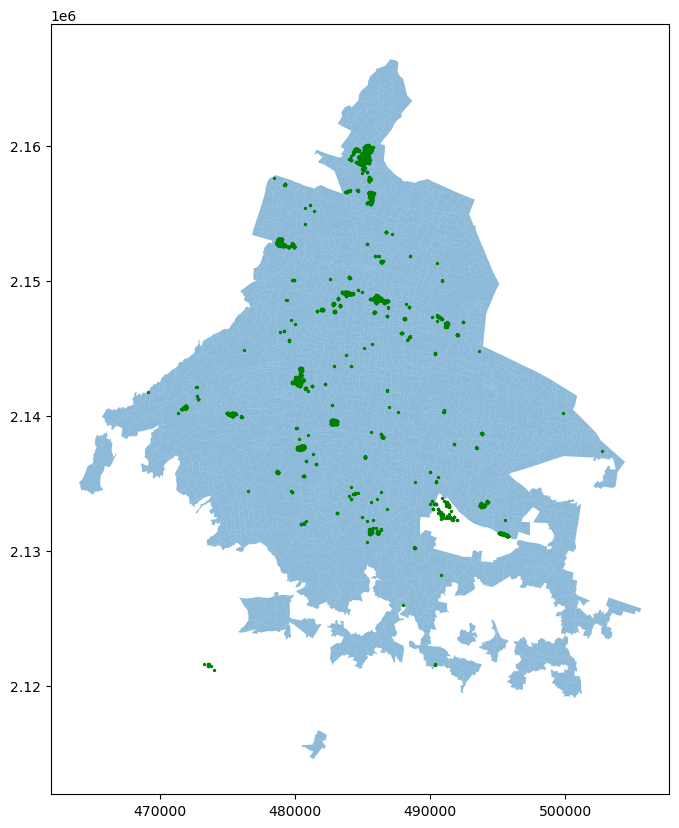

In [3]:
# Leer datos geoespaciales sobre Áreas Geoestadísticas Básicas (AGEBs) de la Ciudad de México desde un archivo shapefile
agebs = gpd.read_file('datos/09_ciudaddemexico/conjunto_de_datos/09a.shp')

# Convertir los datos al sistema de referencia espacial (CRS) proyectado 'EPSG:32614' (UTM zona 14N)
agebs = agebs.to_crs('EPSG:32614')

# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Visualizar las AGEBs en el gráfico con transparencia (alpha=0.5) para mayor claridad
agebs.plot(ax=ax, alpha=0.5)

# Visualizar los puntos que representan los árboles (almacenados en el GeoDataFrame 'treescdmx')
# usando marcadores de tamaño 2 y color verde ('g')
treescdmx.plot(ax=ax, markersize=2, color='g')

# Mostrar el gráfico
plt.show()


In [3]:
treescdmx

,geometry,OMSid,height,natural,type,name,denotation,leaf_type,source,layer,...,image,age,monument,species:wikidata,species:wikipedia,start_date,survey:date,heritage,genus:es,noname
0,POINT (-99.18396 19.37180),1439029295,14,tree,Fresno,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (-99.18117 19.37056),1496862396,30,tree,Fresno,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (-99.14353 19.43723),1702714870,NaN,tree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (-99.18302 19.28339),3174250193,NaN,tree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POINT (-99.20162 19.41011),3339441206,NaN,tree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,POINT (-99.20303 19.31611),11035016685,NaN,tree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3920,POINT (-99.20296 19.31618),11035016686,NaN,tree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3921,POINT (-99.20306 19.31616),11035016687,NaN,tree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3922,POINT (-99.20309 19.31609),11035016688,NaN,tree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Obtención de vialidades

In [4]:
# Construcción de la consulta para obtener datos sobre calles (vías) en la CDMX
street_query = overpassQueryBuilder(area=areaId, elementType='way', selector='"highway"', out='body', includeGeometry=True)

# Ejecución de la consulta a través de la API de Overpass
# Se establece un tiempo máximo de espera (timeout) de 120 segundos en caso de que la consulta sea extensa
street_data = overpass.query(street_query, timeout=120)

# Construcción de un GeoDataFrame a partir de los datos obtenidos sobre las calles
street_geo = [(street.geometry(), street.id(), street.tags()) for street in street_data.ways()]
streetscdmx = gpd.GeoDataFrame(street_geo, columns=['geometry', 'OMSId', 'tags'])

# Separar las etiquetas (tags) del GeoDataFrame en columnas individuales
streetscdmx = pd.concat([streetscdmx.drop(['tags'], axis=1), streetscdmx['tags'].apply(pd.Series)], axis=1)

# Establecer el sistema de referencia espacial (CRS) como WGS 84 (latitud y longitud)
streetscdmx = streetscdmx.set_crs('4326')

# NOTA: La siguiente línea está comentada. Si se desea guardar los datos en un archivo shapefile, se puede descomentar
# y ajustar el código según la ubicación y nombre del archivo deseado.

# streetscdmx.to_file('streetscdmx.shp')

# A partir de este punto, el GeoDataFrame 'streetscdmx' contiene información geoespacial y atributos de las calles en la CDMX,
# listos para su análisis y visualización junto con los datos de los árboles previamente obtenidos.


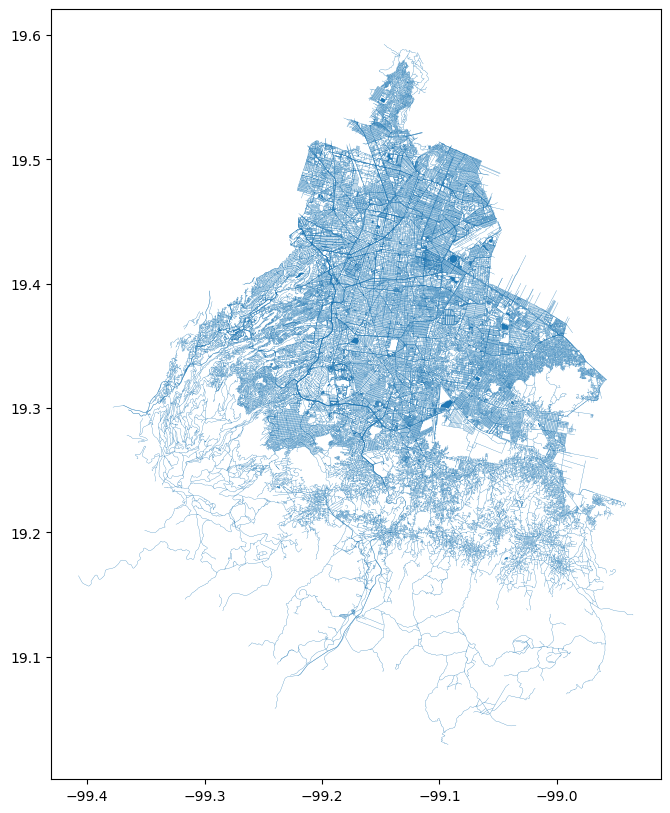

In [5]:
fig,ax= plt.subplots(figsize=(10,10))
streetscdmx.plot(ax=ax,linewidth=0.2)
plt.show()

## Obtención de cualquiera de la info de OMS

In [8]:
# Construcción de la consulta para obtener datos sobre mercados en la CDMX
mercados_query = overpassQueryBuilder(area=areaId, elementType='way', selector=["'amenity'='marketplace'", "'name'~'Mercado'"], out='body', includeGeometry=True)

# Ejecución de la consulta a través de la API de Overpass
mercados_data = overpass.query(mercados_query)

# Construcción de un GeoDataFrame a partir de los datos obtenidos sobre los mercados
mercados_geo = [(mercados.geometry(), mercados.id(), mercados.tags()) for mercados in mercados_data.elements()]
mercadoscdmx = gpd.GeoDataFrame(mercados_geo, columns=['geometry', 'OMSid', 'tags'])

# Separar las etiquetas (tags) del GeoDataFrame en columnas individuales
mercadoscdmx = pd.concat([mercadoscdmx.drop(['tags'], axis=1), mercadoscdmx['tags'].apply(pd.Series)], axis=1)

# A partir de este punto, el GeoDataFrame 'mercadoscdmx' contiene información geoespacial y atributos de los mercados en la CDMX,
# listos para su análisis y visualización junto con los datos de los árboles y las calles previamente obtenidos.


In [9]:
mercadoscdmx

,geometry,OMSid,amenity,building,name,opening_hours,3dr:type,name:zh,name:es,alt_name,...,level,source,barrier,smoking,leisure,addr:country,addr:province,survey:date,wheelchair,wikidata
0,"POLYGON ((-99.18923 19.40334, -99.18929 19.402...",44341051,marketplace,yes,Mercado Peña Manterola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"POLYGON ((-99.19150 19.34334, -99.19072 19.343...",130209093,marketplace,yes,Mercado Melchor Muzquiz,Mo-Su 07:00-19:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"POLYGON ((-99.11237 19.36270, -99.11244 19.362...",148762666,marketplace,yes,Mercado Escuadrón 201,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"POLYGON ((-99.14544 19.41351, -99.14532 19.414...",157370541,marketplace,yes,Mi Mercado Hidalgo,NaN,7.1.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"POLYGON ((-99.16752 19.28796, -99.16742 19.288...",217109409,marketplace,yes,"Mercado de la Paz, Tlalpan",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,"POLYGON ((-99.12345 19.40832, -99.12346 19.408...",1164605686,marketplace,NaN,Mercado de Jamaica,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,"POLYGON ((-99.12817 19.43704, -99.12747 19.436...",1164605687,marketplace,NaN,Mercado Aberlardo Rodríguez,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,"POLYGON ((-99.09143 19.38980, -99.09143 19.389...",1166217619,marketplace,yes,Mercado Río Frío,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,"POLYGON ((-99.13755 19.45816, -99.13761 19.457...",1169077445,marketplace,NaN,Mercado Francisco Sarabia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
